In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
test_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [6]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
train_df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [8]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
train_df['education'] = train_df['education'].fillna(train_df['education'].mode()[0])
test_df['education'] = test_df['education'].fillna(test_df['education'].mode()[0])

In [10]:
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].mode()[0])
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].mode()[0])

In [11]:
train_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
train_df.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


/home/optimusprime/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/optimusprime/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


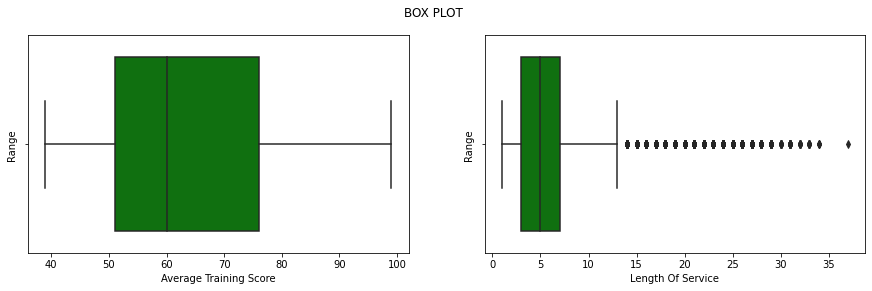

In [13]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(train_df['avg_training_score'], color='green')
plt.xlabel('Average Training Score')
plt.ylabel('Range')

plt.subplot(1, 2, 2)
sns.boxplot(train_df['length_of_service'], color='green')
plt.xlabel('Length Of Service')
plt.ylabel('Range')

plt.suptitle('BOX PLOT');

In [14]:
train_df = train_df[train_df['length_of_service'] > 13].reset_index(drop=True)
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,0,80,0
1,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
2,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
3,77577,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,14,0,0,52,0
4,51256,Finance,region_2,Master's & above,m,other,1,60,5.0,17,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,4210,Analytics,region_2,Master's & above,m,sourcing,1,47,5.0,19,0,0,86,0
3485,41348,Operations,region_2,Bachelor's,f,other,2,52,5.0,18,1,0,56,1
3486,10636,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,47,5.0,15,0,0,50,0
3487,45697,Technology,region_26,Bachelor's,f,other,1,42,3.0,14,0,0,79,0


## EDA

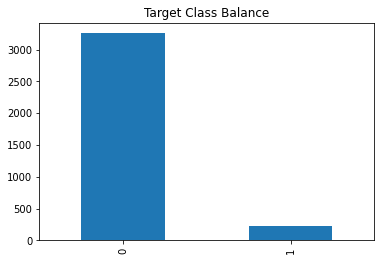

In [15]:
train_df['is_promoted'].value_counts().plot.bar(title='Target Class Balance');

### UNIVARIATE ANALYSIS

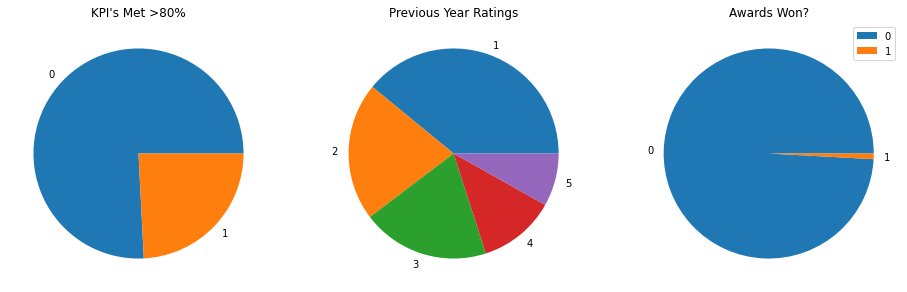

In [16]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
labels = ['0','1']
plt.pie(train_df['KPIs_met >80%'].value_counts(), labels=labels)
plt.title("KPI's Met >80%")

plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
plt.pie(train_df['previous_year_rating'].value_counts(), labels=labels)
plt.title('Previous Year Ratings')

plt.subplot(1, 3, 3)
labels = ['0', '1']
plt.pie(train_df['awards_won?'].value_counts(), labels=labels)
plt.title('Awards Won?')

plt.legend();

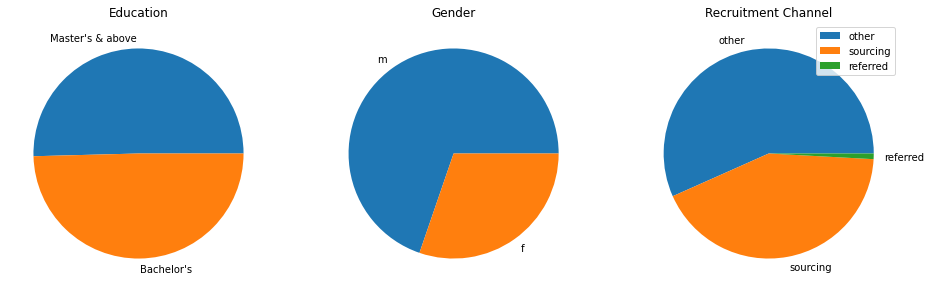

In [17]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
labels = train_df['education'].value_counts().index
plt.pie(train_df['education'].value_counts(), labels=labels)
plt.title("Education")

plt.subplot(1, 3, 2)
labels = ['m', 'f']
plt.pie(train_df['gender'].value_counts(), labels=labels)
plt.title('Gender')

plt.subplot(1, 3, 3)
labels = train_df['recruitment_channel'].value_counts().index
plt.pie(train_df['recruitment_channel'].value_counts(), labels=labels)
plt.title('Recruitment Channel')

plt.legend();

/home/optimusprime/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


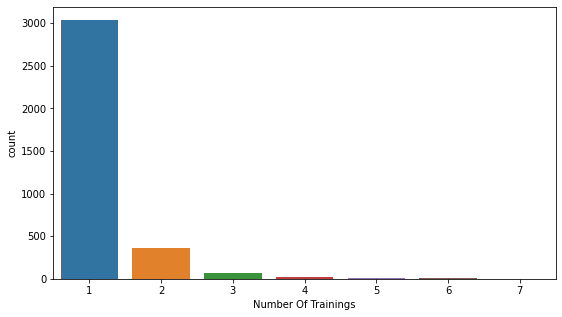

In [18]:
plt.figure(figsize=(9, 5))

sns.countplot(train_df['no_of_trainings'])
plt.xlabel('Number Of Trainings');

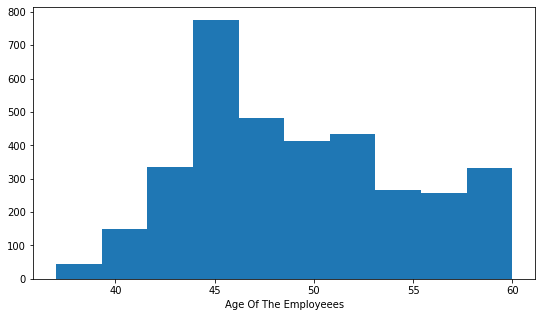

In [19]:
plt.figure(figsize=(9, 5))

plt.hist(train_df['age'])
plt.xlabel('Age Of The Employeees');

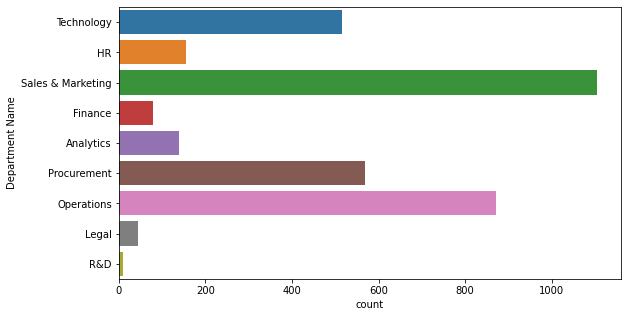

In [20]:
plt.figure(figsize=(9, 5))

sns.countplot(y=train_df['department'], orient='v')
plt.ylabel('Department Name');

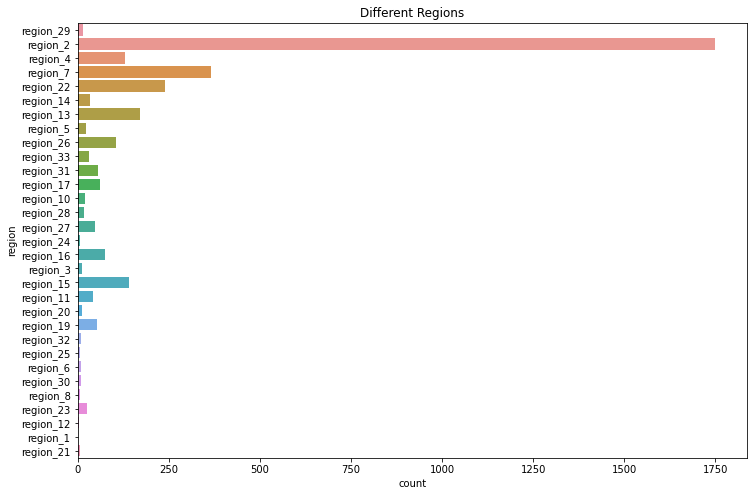

In [21]:
plt.figure(figsize=(12, 8))

sns.countplot(y=train_df['region'], orient='v')
plt.title('Different Regions');

### BIVARIATE ANALYSIS

<Figure size 648x360 with 0 Axes>

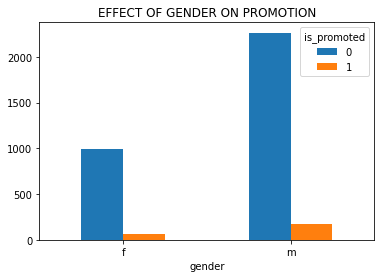

In [22]:
plt.figure(figsize=(9, 5))
x = pd.crosstab(train_df['gender'], train_df['is_promoted'])
x.plot.bar()
plt.xticks(rotation='horizontal')
plt.title('EFFECT OF GENDER ON PROMOTION');

<Figure size 648x360 with 0 Axes>

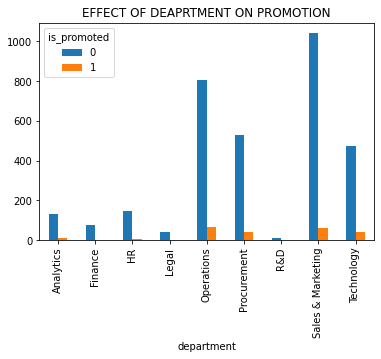

In [23]:
plt.figure(figsize=(9, 5))
x = pd.crosstab(train_df['department'], train_df['is_promoted'])
x.plot.bar()
plt.title('EFFECT OF DEAPRTMENT ON PROMOTION');

/home/optimusprime/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


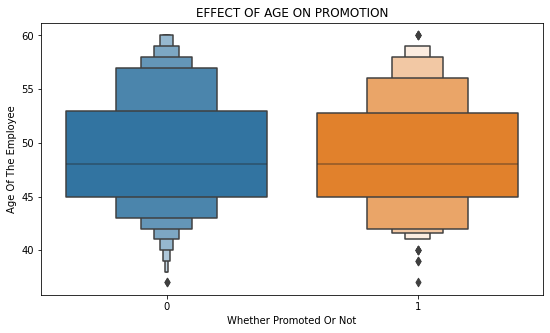

In [24]:
plt.figure(figsize=(9, 5))
sns.boxenplot(train_df['is_promoted'], train_df['age'])
plt.title('EFFECT OF AGE ON PROMOTION')
plt.xlabel('Whether Promoted Or Not')
plt.ylabel('Age Of The Employee');

/home/optimusprime/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


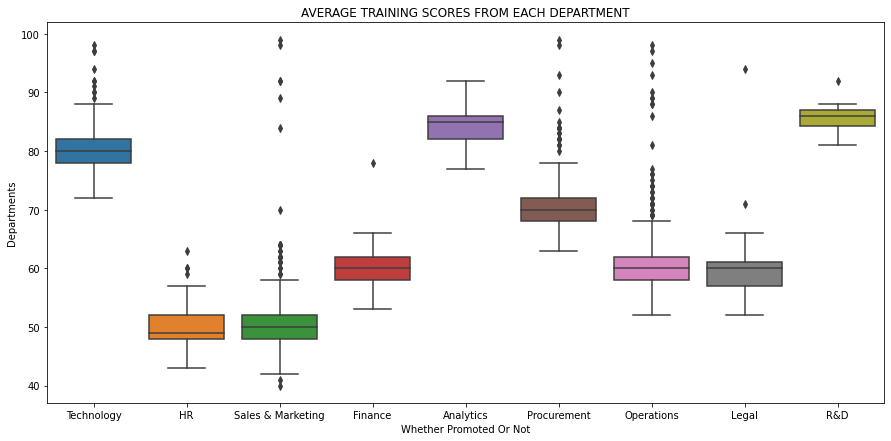

In [25]:
plt.figure(figsize=(15, 7))
sns.boxplot(train_df['department'], train_df['avg_training_score'])
plt.title('AVERAGE TRAINING SCORES FROM EACH DEPARTMENT')
plt.xlabel('Whether Promoted Or Not')
plt.ylabel('Departments');

### MULTIVARIATE ANALYSIS

HEATMAP

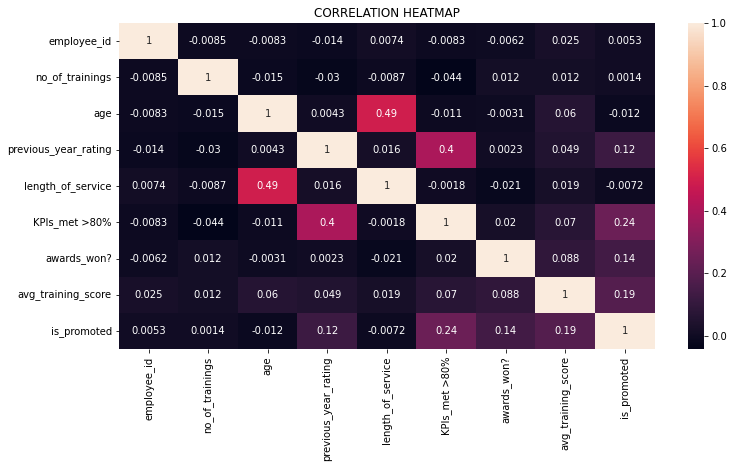

In [26]:
corr = train_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)
plt.title('CORRELATION HEATMAP');

/home/optimusprime/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


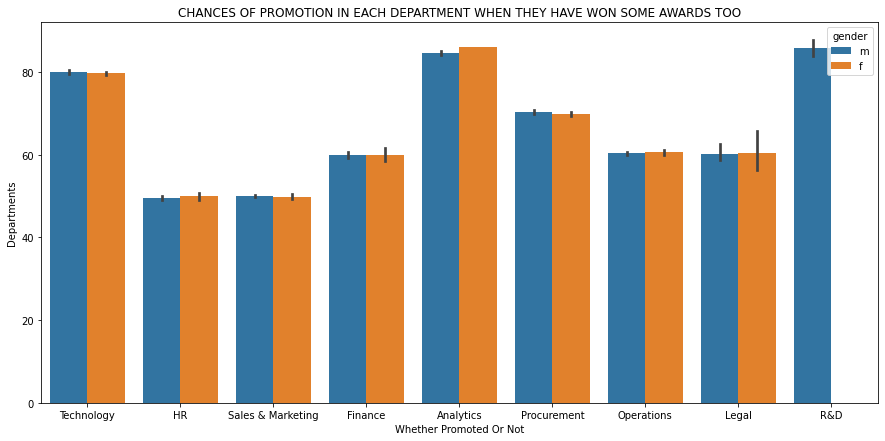

In [27]:
plt.figure(figsize=(15, 7))
sns.barplot(train_df['department'], train_df['avg_training_score'], hue=train_df['gender'])
plt.title('CHANCES OF PROMOTION IN EACH DEPARTMENT WHEN THEY HAVE WON SOME AWARDS TOO')
plt.xlabel('Whether Promoted Or Not')
plt.ylabel('Departments');

## FEATURE ENGINEERING

In [28]:
# Creating A Metric Of Sum
train_df['sum_metric'] = train_df['awards_won?'] + train_df['KPIs_met >80%'] + train_df['previous_year_rating']
test_df['sum_metric'] = test_df['awards_won?'] + test_df['KPIs_met >80%'] + test_df['previous_year_rating']

In [29]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric
0,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,0,80,0,3.0
1,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0,5.0
2,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1,5.0
3,77577,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,14,0,0,52,0,3.0
4,51256,Finance,region_2,Master's & above,m,other,1,60,5.0,17,0,0,59,0,5.0


In [30]:
# Creating A Total Score Column
train_df['total_score'] = train_df['avg_training_score'] * train_df['no_of_trainings']
test_df['total_score'] = test_df['avg_training_score'] * test_df['no_of_trainings']

In [31]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,4.0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,3.0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,1.0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,2.0,195
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,4.0,61


In [32]:
train_df = train_df.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)
test_df = test_df.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)

In [33]:
train_df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Technology,Master's & above,m,2,39,3.0,16,0,0,80,0,3.0,160
1,HR,Bachelor's,m,1,59,4.0,26,1,0,52,0,5.0,52
2,Sales & Marketing,Master's & above,m,1,50,4.0,17,1,0,47,1,5.0,47
3,Sales & Marketing,Bachelor's,m,1,50,3.0,14,0,0,52,0,3.0,52
4,Finance,Master's & above,m,1,60,5.0,17,0,0,59,0,5.0,59


In [34]:
train_df = train_df.drop(train_df[(train_df['KPIs_met >80%'] == 0) & (train_df['previous_year_rating'] == 1.0) & 
      (train_df['awards_won?'] == 0) & (train_df['avg_training_score'] < 60) & (train_df['is_promoted'] == 1)].index)

## ENCODING CATEGORICAL COLUMNS

In [35]:
train_df.select_dtypes('object').head()

,department,education,gender
0,Technology,Master's & above,m
1,HR,Bachelor's,m
2,Sales & Marketing,Master's & above,m
3,Sales & Marketing,Bachelor's,m
4,Finance,Master's & above,m


In [36]:
train_df['department'].value_counts()

Sales & Marketing    1105
Operations            871
Procurement           569
Technology            516
HR                    156
Analytics             139
Finance                79
Legal                  44
R&D                    10
Name: department, dtype: int64

In [37]:
test_df['department'].value_counts()

Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64

In [38]:
train_df['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['department'] = le.fit_transform(train_df['department'])
test_df['department'] = le.fit_transform(test_df['department'])

train_df['gender'] = le.fit_transform(train_df['gender'])
test_df['gender'] = le.fit_transform(test_df['gender'])

In [40]:
train_df['education'] = train_df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))
test_df['education'] = test_df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))

## SPLITTING THE DATA AND RESAMPLING

In [41]:
X = train_df.drop(['is_promoted'], axis=1)
y = train_df['is_promoted']
X_test = test_df

In [42]:
X.shape, y.shape, X_test.shape

((3489, 12), (3489,), (23490, 12))

In [45]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())

In [46]:
X_resample.shape, y_resample.shape

((6510, 12), (6510,))

In [47]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


## SPLITTING THE DATA INTO TRAIN AND TEST SETS & FEATURE SCALING

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

In [49]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape

((5208, 12), (5208, 1), (1302, 12), (1302, 1), (23490, 12))

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [54]:
from sklearn.metrics import confusion_matrix, classification_report 

train_acc = model.score(X_train, y_train)
print(f'THE TRAINING ACCURACY IS : {train_acc}')

val_acc = model.score(X_valid, y_valid)
print(f'THE TRAINING ACCURACY IS : {val_acc}')

THE TRAINING ACCURACY IS : 0.9996159754224271
THE TRAINING ACCURACY IS : 0.9592933947772657


In [55]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[625,  32],
       [ 21, 624]])

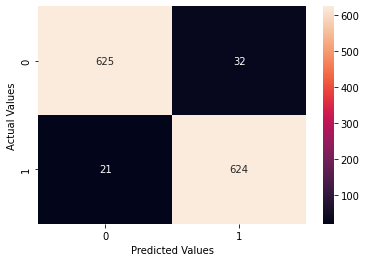

In [57]:
sns.heatmap(cm, annot=True, fmt='.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [59]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       657
           1       0.95      0.97      0.96       645

    accuracy                           0.96      1302
   macro avg       0.96      0.96      0.96      1302
weighted avg       0.96      0.96      0.96      1302

